<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       7914 non-null   float64
 1   Indicator ID    7914 non-null   float64
 2   Name            7914 non-null   object 
 3   Measure         7914 non-null   object 
 4   Measure Info    7914 non-null   object 
 5   Geo Type Name   7914 non-null   object 
 6   Geo Join ID     7914 non-null   float64
 7   Geo Place Name  7914 non-null   object 
 8   Time Period     7833 non-null   object 
 9   Start_Date      7914 non-null   object 
 10  Data Value      7895 non-null   float64
dtypes: float64(4), object(7)
memory usage: 1.5+ MB
None
           Unique ID  Indicator ID   Geo Join ID   Data Value
count    7914.000000   7914.000000  7.914000e+03  7895.000000
mean   419714.588451    404.185873  2.992816e+05    19.747574
std    240234.462189     89.793942  5.534245e+06    21.777600
m

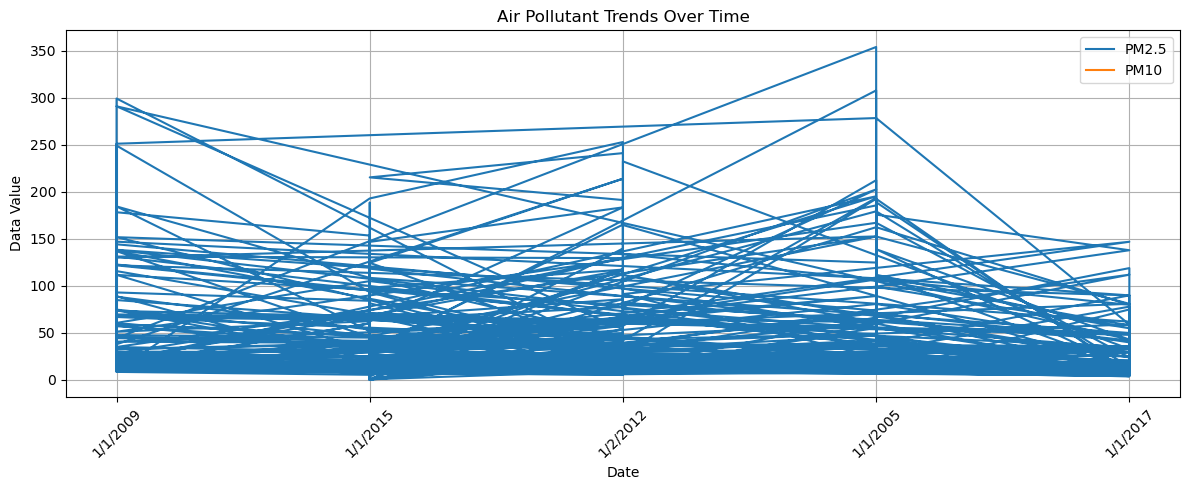

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/kriti/Downloads/Air_Quality.csv")

print(df.info())
print(df.describe())
print(df.head())

print(df.isnull().sum())

numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

print(df['Name'].unique())
# Filter specific pollutants
pm25 = df[df['Name'].str.contains('PM2.5', case=False, na=False)]
pm10 = df[df['Name'].str.contains('PM10', case=False, na=False)]

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(pm25['Start_Date'], pm25['Data Value'], label='PM2.5')
plt.plot(pm10['Start_Date'], pm10['Data Value'], label='PM10')
plt.title("Air Pollutant Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Data Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()



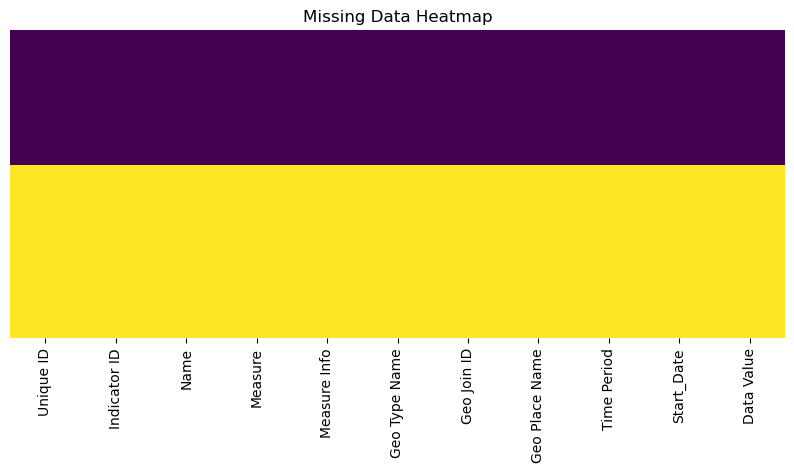

In [79]:
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


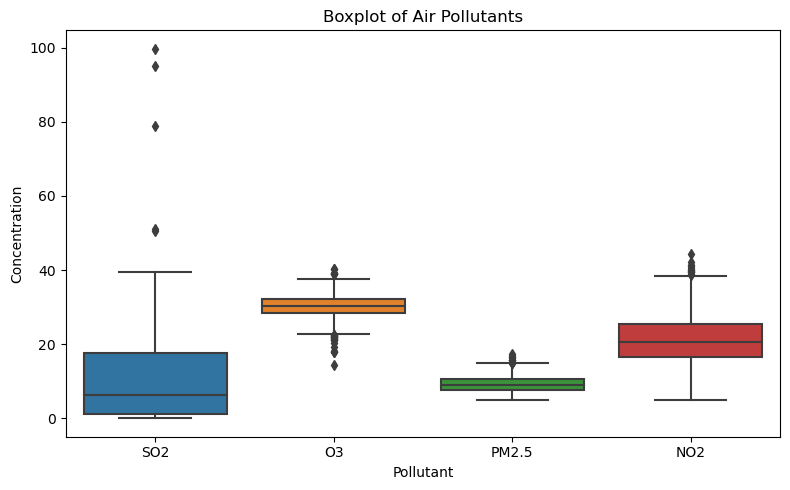

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/kriti/Downloads/Air_Quality.csv")

# Define pollutant name mappings
pollutants_map = {
    'Fine particles (PM 2.5)': 'PM2.5',
    'Nitrogen dioxide (NO2)': 'NO2',
    'Boiler Emissions- Total SO2 Emissions': 'SO2',
    'Ozone (O3)': 'O3'
}

# Filter for selected pollutants
filtered_df = df[df['Name'].isin(pollutants_map.keys())].copy()

# Add clean label for plotting
filtered_df['Pollutant'] = filtered_df['Name'].map(pollutants_map)

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pollutant', y='Data Value', data=filtered_df)
plt.title("Boxplot of Air Pollutants")
plt.ylabel("Concentration")
plt.tight_layout()
plt.show()



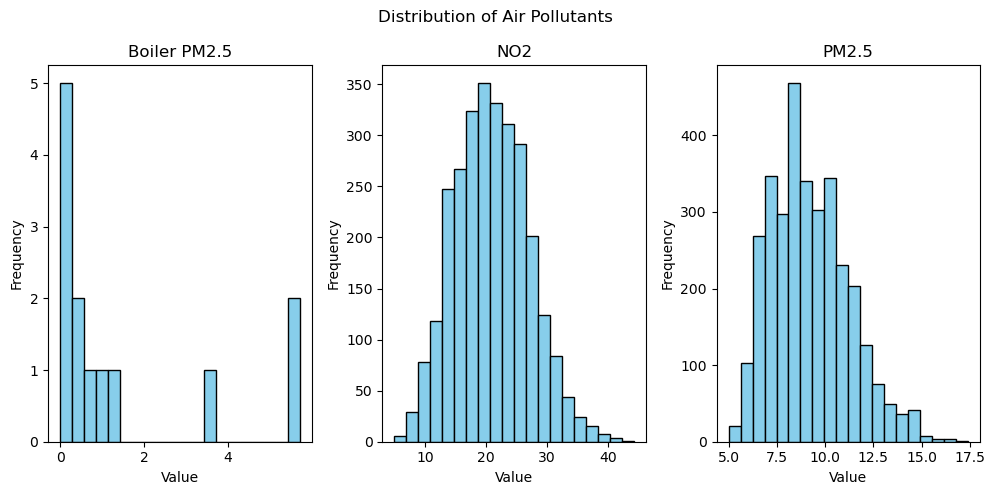

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/kriti/Downloads/Air_Quality.csv")

# Define relevant pollutant names and labels
pollutants_map = {
    'Fine particles (PM 2.5)': 'PM2.5',
    'Nitrogen dioxide (NO2)': 'NO2',
    'Boiler Emissions- Total PM2.5 Emissions': 'Boiler PM2.5'
}

# Filter for selected pollutants
filtered_df = df[df['Name'].isin(pollutants_map.keys())].copy()
filtered_df['Pollutant'] = filtered_df['Name'].map(pollutants_map)

# Create histograms
plt.figure(figsize=(10, 5))
for i, (pollutant, group) in enumerate(filtered_df.groupby('Pollutant')):
    plt.subplot(1, len(pollutants_map), i + 1)
    plt.hist(group['Data Value'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(pollutant)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.suptitle("Distribution of Air Pollutants")
plt.tight_layout()
plt.show()


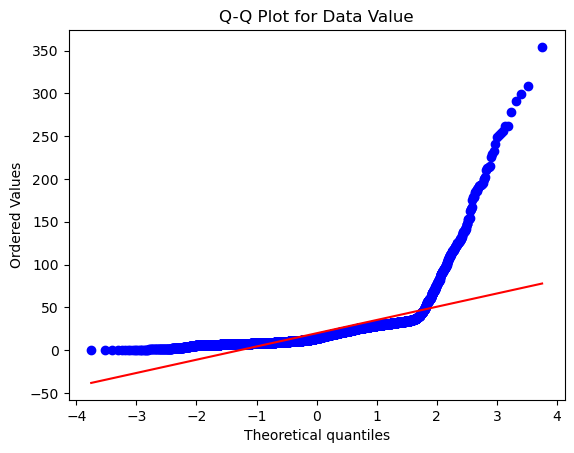

In [46]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q Plot for Data Value (assuming it's equivalent to PM2.5)
stats.probplot(df['Data Value'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot for Data Value")
plt.show()

